In [39]:
from ludwig.api import LudwigModel
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
np.__version__

'1.16.4'

In [41]:
traindf = pd.read_csv("./train.csv")
testdf = pd.read_csv("./test.csv")

In [42]:
# Save the original for later
traindf_old = traindf 
testdf_old = testdf

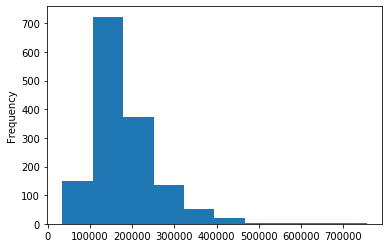

In [43]:
traindf["SalePrice"].plot.hist()

In [44]:
columns = list(traindf.columns)

In [45]:
dtypes = []
for c in columns:
    dtypes.append(traindf[c].dtype)

In [46]:
dtypes2 = []
for d in dtypes:
    if d in ('int64', 'float64'):
        dtypes2.append('numerical')
    if d == object:
        dtypes2.append('category')

In [47]:
input_features = []
for col, dtype in zip(columns[:-1],dtypes2[:-1]):
    input_features.append(dict(name=col,type=dtype))
print(input_features)

[{'name': 'MSSubClass', 'type': 'numerical'}, {'name': 'MSZoning', 'type': 'category'}, {'name': 'LotFrontage', 'type': 'numerical'}, {'name': 'LotArea', 'type': 'numerical'}, {'name': 'Street', 'type': 'category'}, {'name': 'Alley', 'type': 'category'}, {'name': 'LotShape', 'type': 'category'}, {'name': 'LandContour', 'type': 'category'}, {'name': 'Utilities', 'type': 'category'}, {'name': 'LotConfig', 'type': 'category'}, {'name': 'LandSlope', 'type': 'category'}, {'name': 'Neighborhood', 'type': 'category'}, {'name': 'Condition1', 'type': 'category'}, {'name': 'Condition2', 'type': 'category'}, {'name': 'BldgType', 'type': 'category'}, {'name': 'HouseStyle', 'type': 'category'}, {'name': 'OverallQual', 'type': 'numerical'}, {'name': 'OverallCond', 'type': 'numerical'}, {'name': 'YearBuilt', 'type': 'numerical'}, {'name': 'YearRemodAdd', 'type': 'numerical'}, {'name': 'RoofStyle', 'type': 'category'}, {'name': 'RoofMatl', 'type': 'category'}, {'name': 'Exterior1st', 'type': 'category

In [48]:
model_definition = {
    'input_features':input_features,
    'output_features':[
        {'name': 'SalePrice', 'type':'numerical'}
    ]
}

In [49]:
model = LudwigModel(model_definition)
trainstats = model.train(traindf)

In [50]:
print(trainstats)

{'train': OrderedDict([('SalePrice', OrderedDict([('loss', [37905287011.69472, 37827709829.76125, 37749123316.47749, 37669323040.5636, 37588116626.28571, 37505374540.649704, 37421012394.83366, 37334965294.09002, 37247179116.712326, 37157611540.03914, 37066221267.41292, 36972974953.70646, 36877836175.78082, 36780778514.035225, 36681778113.87867, 36580815224.73581, 36477868813.52642, 36372926824.7045, 36265974894.21526, 36157003275.02153, 36046006324.10176, 35932972755.41292, 35817901286.450096, 35700793456.21918, 35581647982.21526, 35460469224.95499, 35337268470.48141, 35212049053.30724, 35084828158.99804, 34955617073.59687, 34824436060.681015, 34691298458.30137, 34556226325.542076, 34419236591.46771, 34280353880.17221, 34139599481.23679, 33996995710.246574, 33852570269.30724, 33706345987.00587, 33558348513.44031, 33408604268.21135, 33257141466.426613, 33103984219.17808, 32949165102.09002, 32792712073.76908, 32634652836.32094, 32475016117.855186, 32313835776.50098, 32151139257.863014, 3

In [51]:
for i in trainstats.keys():
    print(i)
    for j in trainstats[i]:
        print(' ',j)
        for k in trainstats[i][j]:
            print('  ',k)
    print('--')

train
  SalePrice
   loss
   mean_squared_error
   mean_absolute_error
   r2
   error
  combined
   loss
   accuracy
--
validation
  SalePrice
   loss
   mean_squared_error
   mean_absolute_error
   r2
   error
  combined
   loss
   accuracy
--
test
  SalePrice
   loss
   mean_squared_error
   mean_absolute_error
   r2
   error
  combined
   loss
   accuracy
--


In [52]:
print(trainstats['train'].keys())

odict_keys(['SalePrice', 'combined'])


In [53]:
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [59]:
predictions = model.predict(testdf)

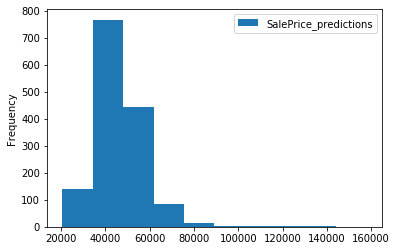

In [60]:
predictions.plot.hist()

In [61]:
predictions.head(10)

,SalePrice_predictions
0,"47,849"
1,"70,276"
2,"55,066"
3,"47,755"
4,"37,810"
5,"46,994"
6,"43,509"
7,"42,870"
8,"48,012"
9,"41,150"


In [62]:
pd.options.display.float_format = '{:,.0f}'.format
predictions.head(10)

,SalePrice_predictions
0,"47,849"
1,"70,276"
2,"55,066"
3,"47,755"
4,"37,810"
5,"46,994"
6,"43,509"
7,"42,870"
8,"48,012"
9,"41,150"


In [63]:
submission = pd.DataFrame(testdf_old['Id'])
submission['SalePrice'] = predictions

In [64]:
submission.head()

,Id,SalePrice
0,1461,"47,849"
1,1462,"70,276"
2,1463,"55,066"
3,1464,"47,755"
4,1465,"37,810"


In [65]:
submission.to_csv('submission.csv',index=False)